# Clustering Lab

In [138]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [103]:
# Load the datasets
NBA_perf = pd.read_csv('NBA_PlayerStats2324.csv', encoding="latin1")
NBA_salary = pd.read_csv('NBA_salary.csv', encoding="latin1")

In [104]:
# Merging the two datasets
NBA = pd.merge(NBA_perf, NBA_salary, how='inner', left_on='Player', right_on='Player')
NBA['Salary'] = NBA['2024-25'].str.replace('$', '').str.replace(',', '').astype(float)

In [105]:
#Drop variables that will not be needed or are duplicates
def drop_columns(df):
     # Dropping all repetitive columns
     df = df.drop(columns=['Rk_x','GS', 'FGA', 'FG%', '3PA', '3P%',
          '2PA', '2P%', 'FTA', 'FT%', 'ORB', 'DRB', 'Awards', 'Player-additional', 
          '2024-25', '2025-26', '2026-27', '2027-28', '2028-29', '2029-30',
          'Tm', 'Guaranteed', '-9999', 'Rk_y'], axis=1)  
     df = df.dropna()

     # Dropping duplicates
     df = df.drop_duplicates(subset = ['Player'], keep = 'last')
     return df

NBA = drop_columns(NBA)

In [106]:
# Scale the data

columns_for_scaling = ['FG','3P', '2P', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV']
scaler = StandardScaler()
NBA[columns_for_scaling] = scaler.fit_transform(NBA[columns_for_scaling])


In [107]:
#Run the clustering algo with your best guess for K
clust_data1 = NBA[["FG", "AST", "TRB"]]
kmeans_obj1 = KMeans(n_clusters=2, random_state=1).fit(clust_data1)

In [108]:
#View the results
print("Results:")
print(kmeans_obj1.cluster_centers_)
print(kmeans_obj1.labels_)
print(kmeans_obj1.inertia_)

Results:
[[ 1.11653579  0.9969124   0.93640791]
 [-0.59408131 -0.53043264 -0.49823968]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
544.582617869168


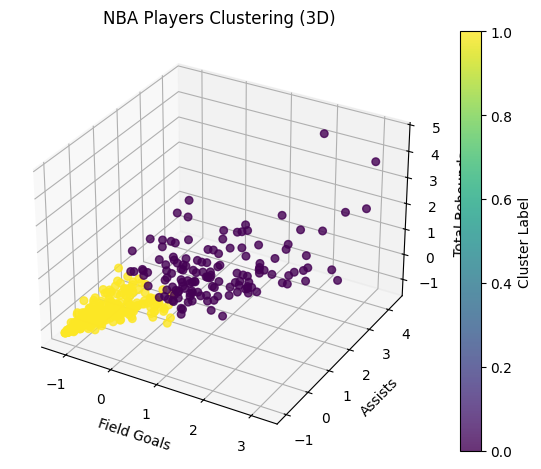

<Figure size 640x480 with 0 Axes>

In [128]:
#Create a visualization of the results with 2 or 3 variables that you think will best
#differentiate the clusters

kmeans_obj1 = KMeans(n_clusters=2, random_state=1).fit(clust_data1)
NBA['Cluster'] = kmeans_obj1.labels_
ax = plt.subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(NBA['FG'], NBA['AST'], NBA['TRB'],c=kmeans_obj1.labels_, cmap='viridis', s=30, alpha=0.8)
ax.set_xlabel('Field Goals')
ax.set_ylabel('Assists')
ax.set_zlabel('Total Rebounds')
ax.set_title('NBA Players Clustering (3D)')

plt.colorbar(scatter, label='Cluster Label')
plt.tight_layout()
plt.show()
plt.savefig("2clusters.png")

In [129]:
#Evaluate the quality of the clustering using total variance explained and silhouette scores
print("Cluster Evaluation:")
# Total Variance Explained and Silhouette Score 
# Total Variance Explained
total_sum_squares = np.sum((clust_data1 - np.mean(clust_data1))**2)
total = np.sum(total_sum_squares)
between_SSE = (total-kmeans_obj1.inertia_)
var_explained = between_SSE/total
print(f'Total Variance Explained: {var_explained}')
# Silhouette Score
silhouette_avg = silhouette_score(clust_data1, kmeans_obj1.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Cluster Evaluation:
Total Variance Explained: 0.5528878342617669
Silhouette Score: 0.5182414341100418


/home/vscode/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



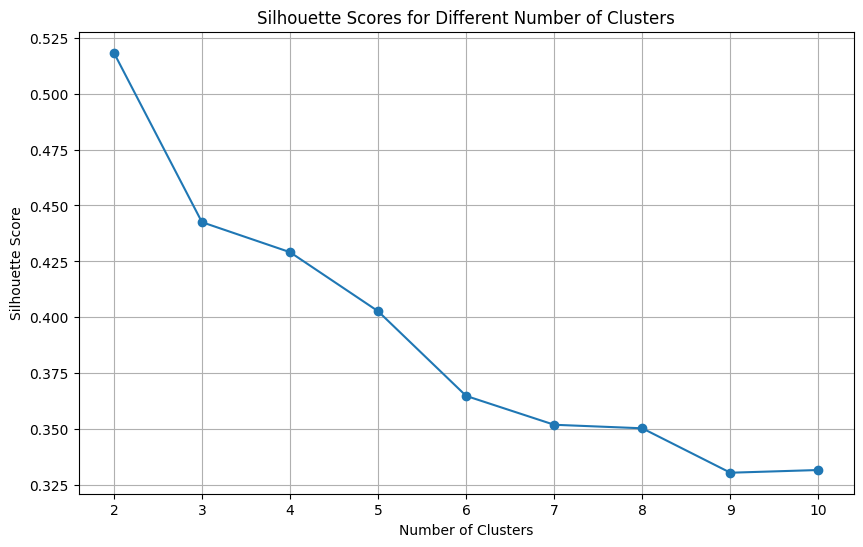

In [130]:
#Determine the ideal number of clusters using the elbow method and the silhouette coefficient

# Silhouette Coefficient
silhouette_scores = []
for k in range(2, 11):
    kmeans_obj = KMeans(n_clusters=k, random_state=1).fit(clust_data1)
    silhouette_avg = silhouette_score(clust_data1, kmeans_obj.labels_)
    silhouette_scores.append(silhouette_avg)
# Plotting the silhouette scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

In [131]:
#Visualize the results of the elbow method

# Elbow Method 
css = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(clust_data1)
    css.append(kmeans.inertia_)
               
elbow_data = pd.DataFrame({'Clusters': range(2, 11), 'CSS': css})
fig = px.line(elbow_data, x='Clusters', y='CSS', title='Elbow Method for Optimal Clusters',
                 labels={'Clusters': 'Number of Clusters', 'CSS': 'Total Sum of Squares'})
fig.show()

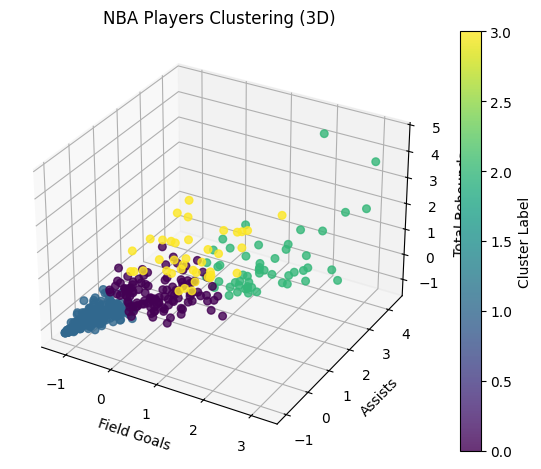

<Figure size 640x480 with 0 Axes>

In [133]:
#Use the recommended number of cluster (assuming it's different) to retrain your model and visualize the results

# Assuming the recommended number of clusters is 4
kmeans_obj1 = KMeans(n_clusters=4, random_state=1).fit(clust_data1)
NBA['Cluster'] = kmeans_obj1.labels_
ax = plt.subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(NBA['FG'], NBA['AST'], NBA['TRB'],c=kmeans_obj1.labels_, cmap='viridis', s=30, alpha=0.8)
ax.set_xlabel('Field Goals')
ax.set_ylabel('Assists')
ax.set_zlabel('Total Rebounds')
ax.set_title('NBA Players Clustering (3D)')

plt.colorbar(scatter, label='Cluster Label')
plt.tight_layout()
plt.show()
plt.savefig("4clusters.png")

In [134]:
#Once again evaluate the quality of the clustering using total variance explained and silhouette scores
print("Cluster Evaluation:")
# Total Variance Explained and Silhouette Score 
# Total Variance Explained
total_sum_squares = np.sum((clust_data1 - np.mean(clust_data1))**2)
total = np.sum(total_sum_squares)
between_SSE = (total-kmeans_obj1.inertia_)
var_explained = between_SSE/total
print(f'Total Variance Explained: {var_explained}')
# Silhouette Score
silhouette_avg = silhouette_score(clust_data1, kmeans_obj1.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Cluster Evaluation:
Total Variance Explained: 0.7471107722921322
Silhouette Score: 0.4291182269396123


/home/vscode/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [135]:
#Use the model to select players for Mr. Rooney to consider

# Best Players in Cluster 2 
def undervalued_players1(cluster, num_players):
    df = NBA[NBA['Cluster'] == cluster].copy()
    # Using a performance score 
    df['Performance'] = df['FG'] + df['AST'] + df['TRB']
    # Using performance per salary
    df['Value'] = df['Performance'] / df['Salary']
    # Select top players by value
    players = df.nlargest(num_players, 'Value')
    return players[['Player', 'Salary', 'FG', 'AST', 'TRB', 'Value']]
players = undervalued_players1(2, 5)
print("Top 5 Undervalued Players in Cluster 2:")
print(players)

Top 5 Undervalued Players in Cluster 2:
             Player      Salary        FG       AST       TRB         Value
162      Tyus Jones   2087519.0  0.503751  2.430106 -0.293348  1.264903e-06
48   Jalen Williams   4775760.0  1.614801  1.269666  0.248037  6.559172e-07
110     Josh Giddey   8352367.0  0.905845  1.725299  1.467467  4.907125e-07
15   Paolo Banchero  12160800.0  2.165035  2.045665  1.677714  4.842127e-07
37     Franz Wagner   7007092.0  1.572475  0.892345  0.768397  4.614207e-07


In [136]:
# Best Players in Cluster 3
def undervalued_players2(cluster, num_players):
    df = NBA[NBA['Cluster'] == cluster].copy()
    # Using a performance score 
    df['Performance'] = df['FG'] + df['AST'] + df['TRB']
    # Using performance per salary
    df['Value'] = df['Performance'] / df['Salary']
    # Select top players by value
    players = df.nlargest(num_players, 'Value')
    return players[['Player', 'Salary', 'FG', 'AST', 'TRB', 'Value']]
players = undervalued_players2(3, 5)
print("Top 5 Undervalued Players in Cluster 3:")
print(players)

Top 5 Undervalued Players in Cluster 3:
               Player     Salary        FG       AST       TRB         Value
53   Alperen ÅengÃ¼n  5424654.0  1.567184  1.198473  1.861679  8.530198e-07
148       Jalen Duren  4536840.0  0.625438  0.023795  2.492419  6.924758e-07
126     Jalen Johnson  4510905.0  0.678345  0.422474  1.330807  5.390549e-07
140     Jeremy Sochan  5570040.0  0.577821  0.749960  1.267733  4.659776e-07
209     Jabari Walker  2019699.0  0.017006 -0.517269  1.435930  4.632706e-07


In [137]:
# Bad choices players
def overvalued_players(cluster, num_players):
    df = NBA[NBA['Cluster'] == cluster].copy()
    # Using a performance score 
    df['Performance'] = df['FG'] + df['AST'] + df['TRB']
    # Using performance per salary
    df['Value'] = df['Performance'] / df['Salary']
    # Select bad players by value
    players = df.nsmallest(num_players, 'Value')
    return players[['Player', 'Salary', 'FG', 'AST', 'TRB', 'Value']]
players = overvalued_players(1, 5)
print("Top 5 Overvalued Players:")
print(players)

Top 5 Overvalued Players:
                    Player    Salary        FG       AST       TRB     Value
501            Daishen Nix  119972.0 -1.173404 -0.980021 -1.218434 -0.000028
434  Javon Freeman-Liberty  100000.0 -0.930032 -0.737966 -0.866270 -0.000025
419        Bismack Biyombo  143967.0 -1.183986 -1.008498 -1.139591 -0.000023
455            Chuma Okeke  119972.0 -1.009392 -0.880351 -0.813709 -0.000023
400         Eugene Omoruyi  119972.0 -0.792473 -0.773562 -0.787428 -0.000020


Answer: 
* Examples that are not good choices (3 or 4) 
  * Daishen Nix, Bismack Biyombo, Chuma Okeke
* Several options that are good choices (3 or 4)
  * Tyus Jones, Jalen Williams, Josh Giddey
* Several options that could work, assuming you can't get the players in the good category (3 or 4)
  * Alperen Sengun, Jalen Duren, Jalen Johnson, Jeremy Sochan